<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Feature_Importance_Logistic_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
df = df[df['n/m']==2]
#df = df[df['y'] <= 10 or df['y']>1000]

print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

700


In [2]:
X_modified = X.drop(['indeks','range', 'subtype'], axis=1)
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)


shuffled['y_new'] = y_new

shuffled = shuffled[shuffled['y_new'] != 1]
shuffled = shuffled[shuffled['y_new'] != 2]

X = shuffled.loc[:, select]
X_modified = X.drop(['indeks','range', 'subtype'], axis=1)

#print(shuffled.head())
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
print(X_modified.head())
#X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

   class    n   m  n/m  (n/m)^2  (n/m)^3  m/n  (m/n)^2  (m/n)^3   av.length  \
0      5   80  40  2.0      4.0      8.0  0.5     0.25    0.125  105.625000   
1      4  120  60  2.0      4.0      8.0  0.5     0.25    0.125   97.283333   
2      6   80  40  2.0      4.0      8.0  0.5     0.25    0.125  199.600006   
3      2  100  50  2.0      4.0      8.0  0.5     0.25    0.125   60.869999   
4      4  100  50  2.0      4.0      8.0  0.5     0.25    0.125  100.610001   

     std.dev  median  min  max   k  
0  51.232498   106.5    6  222  66  
1  18.828365    98.0   39  136  57  
2  69.710716   207.5   85  305  64  
3  23.430387    61.0   20  100  57  
4  22.366051   105.5   46  150  58  


In [3]:
from imblearn.over_sampling import SMOTE

smote_on_3 = 50
oversample = SMOTE(sampling_strategy={ 3:509})
X_modified, y_encoded = oversample.fit_resample(X_modified, y_encoded)
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded


y_new = []
for val in y_encoded:
  if(val[0]==1):
    y_new.append(0)
  elif(val[1]==1):
    y_new.append(1)
  elif(val[2]==1):
    y_new.append(2)
  else:
    y_new.append(3)


[0.10321552 0.05947022 0.12985652 0.         0.         0.
 0.         0.         0.         0.72351109 0.01906765 0.34195361
 0.07875527 1.         0.265354  ]


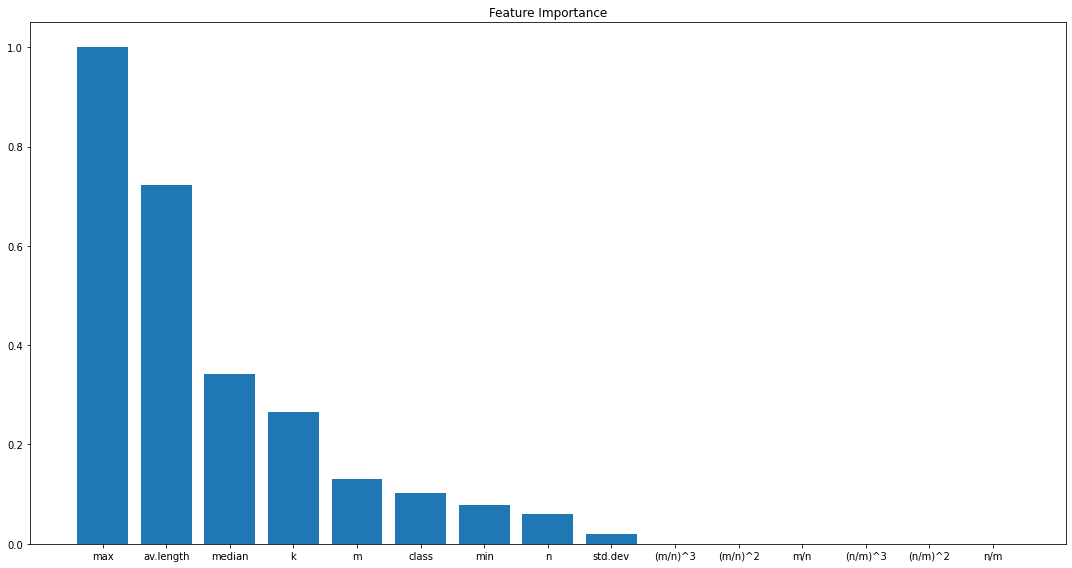

In [4]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

X_copy = X_modified
X_modified = sc.fit_transform(X_modified)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_modified, y_new)

importances = model.coef_[0]
importances = abs(importances)

importances = (importances-np.min(importances))/np.ptp(importances)

sorted_indices = np.argsort(importances)[::-1]
feat_labels = X_copy.columns[1:]

print(importances)

plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.bar(range(X_copy.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_copy.shape[1]), X_copy.columns[sorted_indices])
plt.tight_layout()
plt.show()
